# 2. Simulation of ODEs in Julia

To simulate (systems of) ODEs in Julia, we use the [DifferentialEquations](https://docs.sciml.ai/DiffEqDocs/stable/) module. This makes it easy to define all kinds of ODE systems, from very simple towards increasingly complicated definitions. This overview shows some of the basic functionality of ODE systems, from simulating a basic set of equations to the use of callbacks to perturb the system at given timepoints. We start with importing some of the required modules into Julia with the `using` keyword. In this example, we only use the `DifferentialEquations` module and the `Plots` module for plotting our final solutions.

In [1]:
using DifferentialEquations, Plots, Sundials

## The Lotka-Volterra System
A simple example of an ODE system that can easily be simulated is are the Lotka-Volterra equations. These are a classic example of a predator-prey system, or a feast-famine regime. The equations are as follows.
$$
\begin{align}
\dot{x} &= \alpha x - \beta x y \\
\dot{y} &= \gamma x y - \delta y

\end{align}
$$

The system contains four parameters, depicted by $[\alpha, \beta, \gamma, \delta]$. Defining a system of ODEs in Julia is similar to matlab. However, even though it is not necessary for the solver to work, we add a parameter `du` to the input of our ODE, which makes the function a *mutating* function (indicated by the exclamation mark at the end of the function name, which is a Julia convention). Instead of defining a new vector of derivatives each function call, we mutate the input derivative vector, which is beneficial for speed and memory usage.

Following the system definition, we define an initial condition and a timespan for our solver. We finally give values to our parameter vector, before we can ask Julia to define an `ODEProblem`. This is an object defined by the `DifferentialEquations.jl` library that works with its `solve` function, and optionally performs some optimizations under the hood. Even though `solve` also has function arguments, we leave it to its simplest form here by just calling it on our recently defined `ODEProblem`.

Plotting our solution is then just a small step away. We have defined some parameters in the plot function to make it look nicer, but `plot(solution)` would have worked as well.

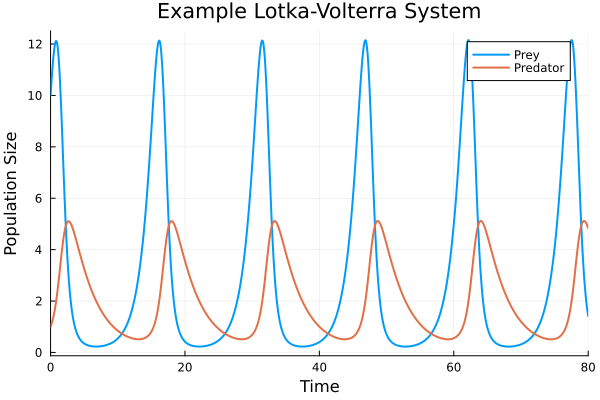

In [3]:
function lotka_volterra!(du, u, parameters, t)
    du[1] = parameters[1].*u[1] .- parameters[2].*u[1].*u[2]
    du[2] = parameters[3].*u[1].*u[2] .- parameters[4].*u[2]
    nothing
end

# initial condition and time span
u0 = [10., 1.]
tspan = (0., 80.)

# parameters
parameters = [0.8, 0.4, 0.1, 0.3]

# simulation
problem = ODEProblem(lotka_volterra!, u0, tspan, parameters)
solution = solve(problem)

plot(solution, labels = ["Prey" "Predator"], linewidth=2, title="Example Lotka-Volterra System", xlabel="Time", ylabel="Population Size")

## Chemical Reaction System

$$
\begin{align}
\dot{X} &= -p_1 X \\
\dot{A} &= p_1 X + \frac{p_2}{1+C} - k_1A - c_1A \\
\dot{B} &= k_1A - k_2B \\
\dot{C} &= \frac{k_2B}{1+C} - c_2C  \\
\end{align}
$$

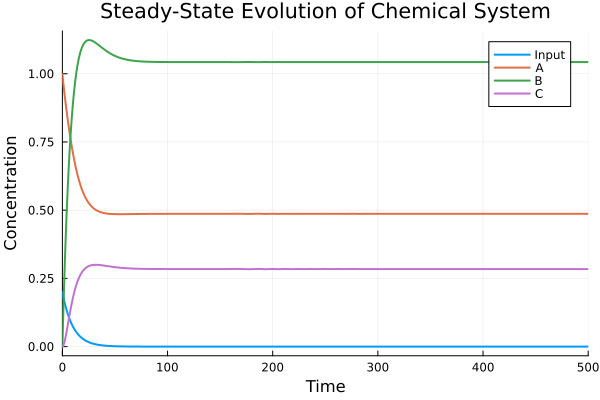

In [4]:
function chemsys!(du, u, p, t)
    X, A, B, C = u
    p1, p2, k1, k2, c1, c2 = p
    du[1] = -p1.*X
    du[2] = p1.*X+((p2)./(1 .+C)) .- (k1+c1).*A
    du[3] = k1.*A .- k2.*B
    du[4] = (k2.*B)./(1 .+C) .- c2.*C
end;

# parameters
u0 = [0.2, 1., 0., 0.]
p = [0.1, 0.1, 0.15, 0.07, 0.01, 0.2]
tspan = (0., 500.)

# and create an ode problem to solve
problem = ODEProblem(chemsys!, u0, tspan, p);

# the solution can be obtained easily
solution = solve(problem);

plot(solution, linewidth=2, labels=["Input" "A" "B" "C"], xlabel="Time", ylabel="Concentration", title="Steady-State Evolution of Chemical System")

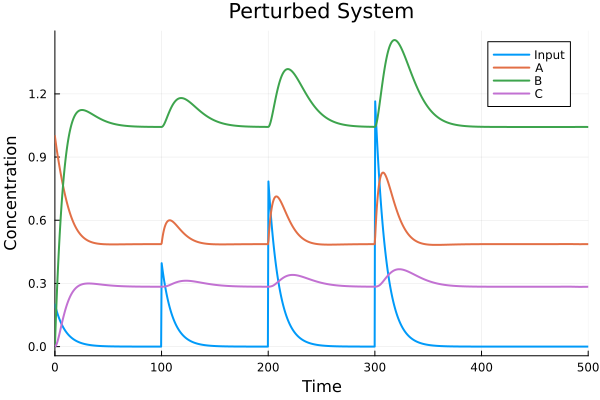

In [5]:
dosetimes = [100. 200. 300.]
condition(u,t,integrator) = t ∈ dosetimes

affect! = function(integrator) 
    integrator.u[1] += 0.4.*integrator.t/100
end

cb = DiscreteCallback(condition,affect!)

solution_with_perturbation = solve(problem,Tsit5(),callback=cb, tstops=dosetimes)
plot(solution_with_perturbation, labels= ["Input" "A" "B" "C"], linewidth=2, title="Perturbed System", xlabel="Time", ylabel="Concentration")